**Task 1** - Load the data

In [4]:
import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/Slasher.csv'
df_slasher=pd.read_csv(data_url)
print(df_slasher.head())
print(df_slasher.shape)

   ID  Gender  Activity  Survival
0   1       1         1         1
1   2       1         1         1
2   3       1         1         1
3   4       1         1         1
4   5       1         1         1
(485, 4)


**Task 2**- Character percentages

In [10]:
df_slasher.head(2)

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1


In [7]:
gender_frequencies=df_slasher['Gender'].value_counts()
gender_frequencies

0    263
1    222
Name: Gender, dtype: int64

In [8]:
gender_frequencies=df_slasher['Gender'].value_counts(normalize=True)
gender_frequencies

0    0.542268
1    0.457732
Name: Gender, dtype: float64

In [9]:
gender_frequencies=df_slasher['Gender'].value_counts(normalize=True)*100
gender_frequencies

0    54.226804
1    45.773196
Name: Gender, dtype: float64

In [12]:
gender_frequencies=df_slasher['Gender'].value_counts(normalize=True)
m_percent=gender_frequencies[0]
f_percent=gender_frequencies[1]

In [15]:
print(m_percent,f_percent,gender_frequencies)

0.5422680412371134 0.4577319587628866 0    0.542268
1    0.457732
Name: Gender, dtype: float64


**Task 3** - Character survival

Calculate the frequency and relative frequency of character survival in this set of slasher films.



In [16]:
survival_frequencies=df_slasher['Survival'].value_counts()
survival_frequencies

0    400
1     85
Name: Survival, dtype: int64

In [17]:
survival_frequencies=df_slasher['Survival'].value_counts(normalize=True)*100
survival_frequencies

0    82.474227
1    17.525773
Name: Survival, dtype: float64

**Task 4**- Joint distribution: character survival and character sex

Next, we're going to calculate the joint distribution of *character sex ("Gender")* and movie *survival*.

* Compute the joint distribution for character sex and survival and name your DataFrame `survival_fm_crosstab`.
    * **Make sure to use the following order of your variables: "Gender", "Survival"**


In [18]:
survival_fm_crosstab=pd.crosstab(index=df_slasher['Gender'],columns=df_slasher['Survival'])
survival_fm_crosstab

Survival,0,1
Gender,,
0,228,35
1,172,50


In [23]:
survival_fm_crosstab=pd.crosstab(index=df_slasher['Survival'],columns=df_slasher['Gender'],margins=True)
survival_fm_crosstab


Gender,0,1,All
Survival,,,
0,228,172,400
1,35,50,85
All,263,222,485


In [22]:
survival_fm_crosstab=pd.crosstab(index=df_slasher['Survival'],columns=df_slasher['Gender'],normalize=True)*100
survival_fm_crosstab

Gender,0,1
Survival,,
0,47.010309,35.463918
1,7.216495,10.309278


**Task 5** - Joint distribution with margins

Now we're going to find the joint distribution but this time add in the **table margins**.

* Compute the joint distribution and assign this to a variable called `survival_fm_margins`.

In [24]:
survival_fm_margins=pd.crosstab(index=df_slasher['Survival'],columns=df_slasher['Gender'],margins=True)
survival_fm_margins

Gender,0,1,All
Survival,,,
0,228,172,400
1,35,50,85
All,263,222,485


**Task 6** - Joint distribution with normalization

In [27]:
survival_fm_crosstab_norm=pd.crosstab(index=df_slasher['Survival'],columns=df_slasher['Gender'],normalize=True)
survival_fm_crosstab_norm

Gender,0,1
Survival,,
0,0.470103,0.354639
1,0.072165,0.103093


In [28]:
survival_fm_crosstab_norm=pd.crosstab(index=df_slasher['Survival'],columns=df_slasher['Gender'],normalize=True)*100
survival_fm_crosstab_norm


Gender,0,1
Survival,,
0,47.010309,35.463918
1,7.216495,10.309278


In [30]:
survival_f=survival_fm_crosstab_norm[1][1]
survival_f

10.309278350515463

**Task 7 ** -Statistical hypotheses


From the list of choices below, select the null and alternative hypotheses to test for a statistically significant relationship between character sex and survival.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: $H_0$: Character sex and survival are related vs. $H_a$: Character sex and survival are unrelated$

B: $H_0$: Character sex and survival are unrelated vs. $H_a$: Character sex and survival are related$

C: $H_0: \mu_1 \neq \mu_2$ vs. $H_a: \mu_1 = \mu_2$

D: $H_0: \mu_1 = \mu_2$ vs. $H_a: \mu_1 \neq \mu_2$

In [36]:
Answer='B'

**Task 8** - Chi-square test

Perform the chi-square test above using `stats.chi2_contingency()`.

In [35]:
import scipy.stats as st

In [37]:
from scipy.stats import chi2_contingency

In [39]:
x2_statistic,pvalue,dof,expctd= chi2_contingency(pd.crosstab(index=df_slasher['Survival'],columns=df_slasher['Gender']))
print(x2_statistic)
print(pvalue)
print(dof)
print(expctd)

6.448486105276047
0.011104692591139978
1
[[216.90721649 183.09278351]
 [ 46.09278351  38.90721649]]


**Task 9**

Select the correct conclusion at the 0.05 significance level from the list of choices below. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: We reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are related.

B: We fail to reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are related.

C: We reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are unrelated.

D: We fail to reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are unrelated.


In [40]:
pval<0.05

In [41]:
Answer='A:We reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are related.'

**Task 10** - Create a bar plot

Create a side-by-side bar plot to illustrate the relationship between character sex and survival in slasher movies.  Sum up your overall results in a sentence or two.


<ipython-input-44-9a5ff3599bab>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_slasher,x='Survival',y='Gender',ci=None)


<Axes: xlabel='Survival', ylabel='Gender'>

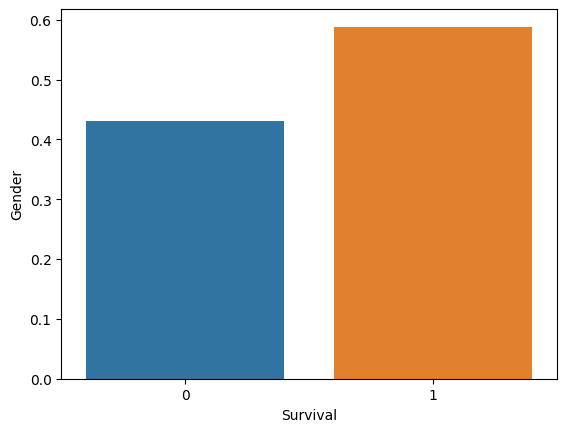

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=df_slasher,x='Survival',y='Gender',ci=None)

**Conclusion : 'Charecter Survival and Sex are Related.228 Men died while 35 survived whereas 172 Women died and 50 survived'Conclusion='Charecter Survival and Sex are Related.228 Men died while 35 survived whereas 172 Women died and 50 survived'**